# Block 1: Load the Dataset

**Explanation:**

**pandas Library:**

A Python library used for data manipulation and analysis. `pd.read_csv()` is used here to load a dataset from a CSV file.

**Dataset Details:**

- `data.info()`: Provides a summary of the dataset, including column names, data types, and the number of non-null entries.
- `data.head()`: Displays the first five rows to give an overview of the data.

**Missing Values Check:**

- `data.isnull().sum()`: Counts missing (null) values in each column to identify any preprocessing needs.

**Dataset Columns:**

- **SL.**: Serial number of the comment.
- **Comment**: The text data (Banglish comments).
- **Hate**: Indicates whether the comment contains hate speech (Yes or No).
- **Type**: Categorizes the type of hate speech (e.g., Sexual, Slang).


In [23]:
# Block 1: Load the Dataset
import pandas as pd

# Load the dataset
file_path = '/content/Banglish Hate Speech Dataset.csv'
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Info:")
data.info()

# Preview the first few rows
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   SL.      5000 non-null   int64 
 1   Comment  5000 non-null   object
 2   Hate     5000 non-null   object
 3   Type     5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB

First 5 rows:
   SL.                                  Comment Hate    Type
0     1  Kanki ki der Allah sob samoy valo rake  Yes  Others
1     2                             khanki akta  Yes  Sexual
2     3                           Ore saniliyon  Yes  Sexual
3     4                    Bokachoda Shangbadik  Yes   Slang
4     5                         Balda dekhaiche  Yes   Slang

Missing values:
SL.        0
Comment    0
Hate       0
Type       0
dtype: int64


# Block 2: EDA (Before Preprocessing)

**Explanation:**

**Visualization Libraries:**

- `matplotlib.pyplot`: A Python library for creating static, interactive, and animated visualizations.
- `seaborn`: A Python library built on matplotlib for making statistical graphics.

**Class Distribution:**

- `sns.countplot()`: Visualizes the count of each class (Yes and No) in the Hate column.

**Text Length Analysis:**

- `data['text_length'] = data['Comment'].apply(len)`: Computes the number of characters in each comment.
- `sns.histplot()`: Plots a histogram to show the distribution of text lengths.


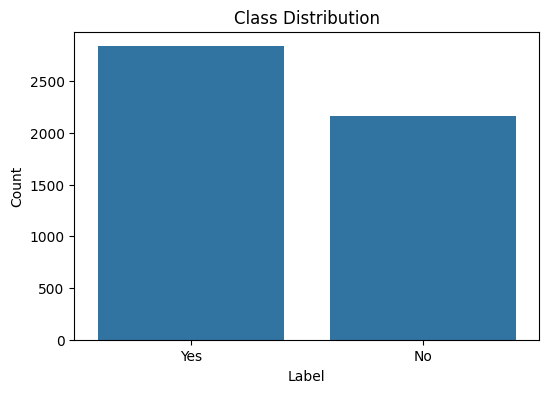

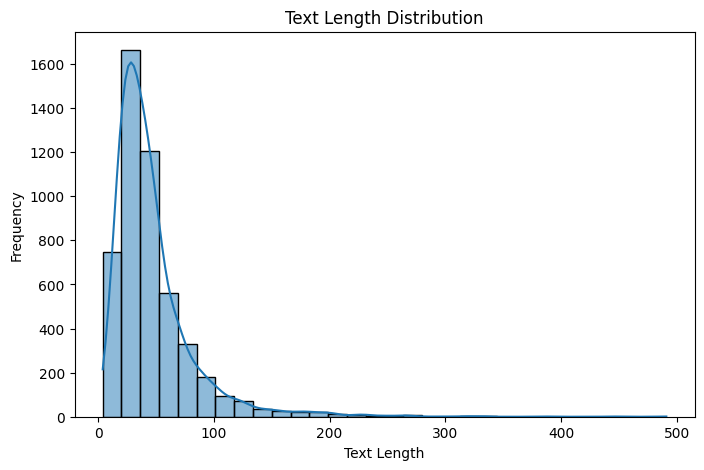

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Hate', data=data)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# Analyze text length
data['text_length'] = data['Comment'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Block 3: Preprocessing

**Explanation:**

**Mapping Labels to Binary Values:**

- `str.strip()`: Removes leading and trailing spaces.
- `str.lower()`: Converts all text to lowercase to ensure consistency.
- `map()`: Converts Yes and No into numeric binary values (1 for hate speech, 0 for non-hate).

**Text Cleaning:**

- `str.replace(r'\W', ' ', regex=True)`: Replaces all non-word characters (e.g., punctuation) with spaces using a regular expression (`\W` matches non-alphanumeric characters).

**Recalculate Text Length:**

After cleaning, the `text_length` column is updated to reflect the new lengths of the comments.


In [25]:
# Map 'Hate' column to binary values
print("\nUnique values in 'Hate':", data['Hate'].unique())
data['Hate'] = data['Hate'].str.strip().str.lower()
data['Hate'] = data['Hate'].map({'yes': 1, 'no': 0})

# Basic text cleaning
data['Comment'] = data['Comment'].str.lower()
data['Comment'] = data['Comment'].str.replace(r'\W', ' ', regex=True)
data['Comment'] = data['Comment'].str.strip()

# Recalculate text length after cleaning
data['text_length'] = data['Comment'].apply(len)


Unique values in 'Hate': ['Yes' 'No']


# Block 4: EDA (After Preprocessing)

This block repeats the visualizations from Block 2 but applies them to the cleaned data to observe changes.

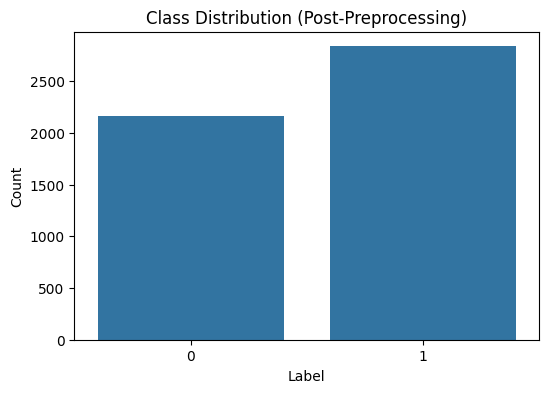

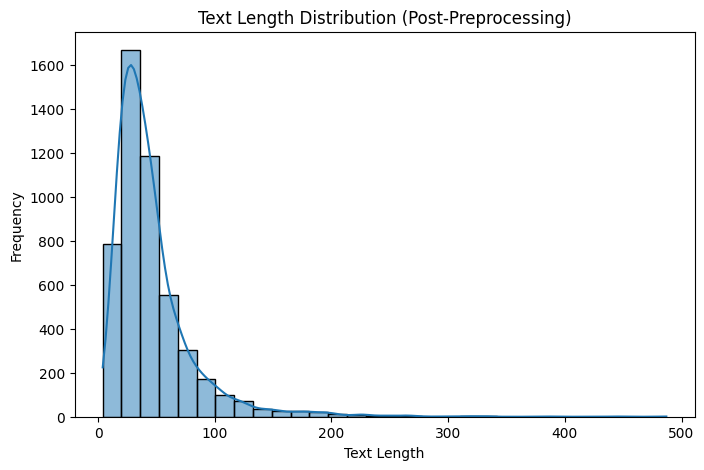

In [26]:
# Class distribution (post-preprocessing)
plt.figure(figsize=(6, 4))
sns.countplot(x='Hate', data=data)
plt.title("Class Distribution (Post-Preprocessing)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# Text length distribution (post-preprocessing)
plt.figure(figsize=(8, 5))
sns.histplot(data['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution (Post-Preprocessing)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


# Block 5: Data Splitting

**Explanation:**

**train_test_split:**

- A function from the `sklearn` library used to split data into training and validation sets.
- `test_size=0.2`: 20% of the data is allocated to the validation set.
- `random_state=42`: Ensures reproducibility of the split.

**Training and Validation Sets:**

- `train_texts` and `val_texts`: Comments split into training and validation sets.
- `train_labels` and `val_labels`: Corresponding labels for hate speech.


In [27]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['Comment'], data['Hate'], test_size=0.2, random_state=42
)

print("\nTraining set size:", len(train_texts))
print("Validation set size:", len(val_texts))


Training set size: 4000
Validation set size: 1000


# Block 6: Tokenization

**Explanation:**

**What is Tokenization?**

The process of splitting text into smaller units (tokens). For example, the sentence "This is hate speech" might be tokenized as `['This', 'is', 'hate', 'speech']`.

**BERT Tokenizer:**

- BERT (Bidirectional Encoder Representations from Transformers) is a transformer-based deep learning model. It supports multilingual and contextualized embeddings.
- The `BertTokenizer` is a part of the `transformers` library, which provides tools to preprocess text for BERT models.
- `bert-base-multilingual-cased`: A pretrained BERT model that supports multiple languages, including Bengali.

**tokenizer.tokenize():**

Converts raw text into subword tokens. BERT uses subword tokenization (e.g., breaking a word like "unhappy" into `['un', '##happy']`).

**Token IDs:**

- `convert_tokens_to_ids`: Maps each token to its corresponding ID in BERT's vocabulary.


In [28]:
from transformers import BertTokenizer

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize a sample
sample_text = train_texts.iloc[0]
tokens = tokenizer.tokenize(sample_text)
print("\nSample tokenized text:", tokens)

# Convert tokens to IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("\nToken IDs:", token_ids)


Sample tokenized text: ['hij', '##la', 'pro', 'max']

Token IDs: [10785, 10330, 11284, 71118]


# Block 7: Text Encoding

**Explanation:**

**Why Encode Texts?**

BERT expects input in the form of token IDs and attention masks. This function encodes the text data accordingly.

**encode_plus():**

- Tokenizes text and converts tokens to IDs.
- `truncation=True`: Ensures text longer than `max_length` (128) is truncated.
- `padding='max_length'`: Ensures all sequences are padded to `max_length` for uniform input size.
- `return_tensors='tf'`: Outputs tensors compatible with TensorFlow.

**Attention Masks:**

A binary mask indicating which tokens should be attended to (1 for real tokens, 0 for padding).

**Numpy Arrays:**

Encoded data and labels are returned as numpy arrays, which are easier to work with in TensorFlow.


In [29]:
import numpy as np

# Define a function to tokenize and encode text
def encode_texts(texts, labels, tokenizer, max_length=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            truncation=True,
            padding='max_length',
            max_length=max_length,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'][0].numpy())
        attention_masks.append(encoded['attention_mask'][0].numpy())

    # Ensure labels are in numpy format
    labels = np.array(labels)

    return np.array(input_ids), np.array(attention_masks), labels

# Convert train_labels and val_labels to lists if necessary
train_labels = train_labels.tolist() if not isinstance(train_labels, list) else train_labels
val_labels = val_labels.tolist() if not isinstance(val_labels, list) else val_labels

# Encode train and validation sets
train_input_ids, train_attention_masks, train_labels = encode_texts(train_texts, train_labels, tokenizer)
val_input_ids, val_attention_masks, val_labels = encode_texts(val_texts, val_labels, tokenizer)


# Block 8: Model Definition

**Explanation:**

**TFBertModel:**

TensorFlow implementation of BERT. It provides access to the pretrained multilingual BERT model.

**Model Architecture:**

- `input_ids` and `attention_mask`: Input layers for token IDs and attention masks.
- `bert_model()`: Produces contextual embeddings for input sequences.
- `pooler_output`: A fixed-size vector representation of the input sequence (used for classification).
- **Dense Layer**: A fully connected layer with a sigmoid activation for binary classification.

**Optimization:**

- **Adam Optimizer**: A widely used optimization algorithm for deep learning.
- **Binary Crossentropy Loss**: Suitable for binary classification tasks.


In [30]:
from transformers import TFBertModel
import tensorflow as tf

# Define the model
def create_model():
    bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

    input_ids = tf.keras.Input(shape=(128,), dtype='int32', name='input_ids')
    attention_mask = tf.keras.Input(shape=(128,), dtype='int32', name='attention_mask')

    bert_output = bert_model(input_ids, attention_mask=attention_mask)
    pooled_output = bert_output.pooler_output  # Use pooled output
    dense = tf.keras.layers.Dense(1, activation='sigmoid')(pooled_output)

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=dense)
    return model

# Instantiate the model
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1778534   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 128, 7                                     

# Block 9: Model Training

**Explanation:**

**model.fit():**

Fits the model to the training data.
- `validation_data`: The validation set is used to monitor the model's performance during training.

**Hyperparameters:**

- `batch_size=16`: The number of samples per training batch.
- `epochs=20`: The number of times the model processes the entire dataset.


In [31]:
# Train the model
history = model.fit(
    [train_input_ids, train_attention_masks],
    train_labels,
    validation_data=([val_input_ids, val_attention_masks], val_labels),
    batch_size=16,
    epochs=20
)


Epoch 1/20
250/250 [==============================] - 136s 426ms/step - loss: 0.6855 - accuracy: 0.5658 - val_loss: 0.6965 - val_accuracy: 0.5530
Epoch 2/20
250/250 [==============================] - 109s 435ms/step - loss: 0.6634 - accuracy: 0.5928 - val_loss: 0.6206 - val_accuracy: 0.6460
Epoch 3/20
250/250 [==============================] - 110s 441ms/step - loss: 0.5909 - accuracy: 0.6740 - val_loss: 0.5784 - val_accuracy: 0.6780
Epoch 4/20
250/250 [==============================] - 110s 439ms/step - loss: 0.5086 - accuracy: 0.7415 - val_loss: 0.5422 - val_accuracy: 0.7130
Epoch 5/20
250/250 [==============================] - 111s 445ms/step - loss: 0.4255 - accuracy: 0.8023 - val_loss: 0.6098 - val_accuracy: 0.7210
Epoch 6/20
250/250 [==============================] - 112s 447ms/step - loss: 0.3287 - accuracy: 0.8577 - val_loss: 0.5781 - val_accuracy: 0.7370
Epoch 7/20
250/250 [==============================] - 111s 446ms/step - loss: 0.2441 - accuracy: 0.9015 - val_loss: 0.6714 -

# Block 10: Model Evaluation

**Explanation:**

**Predictions:**

The model predicts probabilities for each comment.
- `(val_predictions > 0.5).astype(int)`: Converts probabilities to binary outputs (1 for hate speech, 0 for non-hate).

**Evaluation Metrics:**

- `classification_report`: Shows precision, recall, F1-score, and support for each class.
- **Confusion Matrix**: A matrix that visualizes the performance of the classifier (e.g., true positives, false negatives).


32/32 [==============================] - 11s 270ms/step

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.75      0.66      0.70       447
        Hate       0.75      0.82      0.78       553

    accuracy                           0.75      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.75      0.74      1000



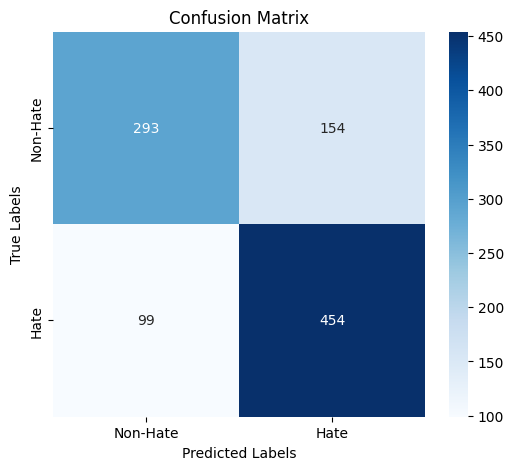

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the validation set
val_predictions = model.predict([val_input_ids, val_attention_masks])
val_predictions = (val_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate using sklearn metrics
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions, target_names=['Non-Hate', 'Hate']))

# Confusion Matrix
cm = confusion_matrix(val_labels, val_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Block 11: Model Saving

**Explanation:**

- `model.save()`: Saves the trained model for reuse. It allows loading the model later without retraining.


In [33]:
# Save the model
model.save('/content/bengali_hate_speech_model')
print("Model saved successfully!")


Model saved successfully!


# **Project Workflow for Bengali Hate Speech Detection**

This project aims to classify comments into "Hate" or "Non-Hate" categories based on the Bengali text using BERT (Bidirectional Encoder Representations from Transformers). The workflow involves the following steps:

## **1. Dataset Overview**
- **Dataset**: Bengali hate speech dataset with 5000 labeled comments.
- **Columns**:
  - **SL.**: Sequential ID.
  - **Comment**: The text of the comment (input text).
  - **Hate**: Binary label indicating whether the comment is hate speech (`Yes`) or non-hate speech (`No`).
  - **Type**: Type of hate speech (optional, not used for classification in this project).

## **2. Data Preprocessing**
### **Text Preprocessing**:
- **Lowercasing**: All comments are converted to lowercase to maintain uniformity.
- **Removal of Special Characters**: Non-alphanumeric characters are removed from the text using regex.
- **Stripping Whitespace**: Any leading/trailing whitespaces are removed.
- **Tokenization**: Text is tokenized using the BERT tokenizer to convert text into individual tokens (subwords).

### **Label Encoding**:
- The 'Hate' column is mapped to binary values:
  - `Yes → 1` (Hate)
  - `No → 0` (Non-Hate)

## **3. Tokenization and Attention Mask**
### **BERT Tokenizer**:
- The BERT tokenizer splits the raw text into tokens and converts them into corresponding token IDs using the BERT vocabulary.

### **Attention Mask**:
- **Purpose**: To inform the model which tokens are valid (real words) and which are padding.
- **Mask Values**:
  - `1`: For real tokens.
  - `0`: For padding tokens (added to standardize input sequence length).

## **4. Feature Extraction Using TFBertModel**
### **What is TFBertModel?**
- TFBertModel is the TensorFlow implementation of the BERT model.
- BERT is a transformer-based model pretrained on vast amounts of text data (like Wikipedia) and fine-tuned for specific tasks such as text classification, question answering, etc.
- TFBertModel is used here to extract contextualized word embeddings that represent each token in the sentence based on the entire sentence context.

### **How TFBertModel Works**:
- **Input**: Tokenized text with corresponding attention masks.
- **Outputs**:
  - **Last Hidden States**: A sequence of embeddings for each token in the input sequence, representing its meaning based on the surrounding context.
  - **Pooled Output**: A single embedding for the entire sentence, obtained from the special `[CLS]` token (used for classification tasks).

### **Why TFBertModel is Used**:
- BERT's bidirectional attention mechanism allows it to consider the context from both directions (left-to-right and right-to-left), making it highly effective for understanding the meaning of words in relation to their surroundings.
- **Fine-Tuning**: The TFBertModel is pretrained, and we fine-tune it for the specific task of hate speech detection by adding a classification layer on top.

## **5. Classification Head**
- **Pooled Output**: The output of the `[CLS]` token is passed through a dense layer.
- **Dense Layer**: This layer has a sigmoid activation function, which converts the model's output into a probability between 0 and 1, indicating whether the comment is "Hate" (1) or "Non-Hate" (0).

## **6. Model Training**
### **Training Process**:
- The model is trained using binary cross-entropy loss, as it is a binary classification problem.
- Adam optimizer with a learning rate of `1e-5` is used for training, which allows fine-tuning of the pretrained BERT model.
- **Epochs**: The model is trained for 20 epochs to optimize the weights.

## **7. Model Evaluation**
### **Metrics**:
- **Accuracy**: The percentage of correctly classified comments.
- **Classification Report**: Includes precision, recall, and F1-score for both classes (Hate and Non-Hate).
- **Confusion Matrix**: Visualizes the model’s performance, showing true positives, false positives, true negatives, and false negatives.

## **Key Concepts in the Model**
### **1. BERT (Bidirectional Encoder Representations from Transformers)**
- Transformer-based model that uses a bidirectional attention mechanism, considering context from both directions.
- **Pretraining**: Trained on large text corpora and fine-tuned for tasks like hate speech detection.

### **2. Transformer Architecture**
- Built on self-attention layers that attend to different parts of the input sequence simultaneously.
- Efficient for handling long-range dependencies in text without relying on sequence order.

### **3. Attention Mask**
- **Purpose**: Tells the model which tokens are real and which are padding.
- **Values**:
  - `1`: Valid tokens (real words).
  - `0`: Padding tokens.

### **4. TFBertModel**
- TensorFlow implementation of BERT.
- Processes input using multi-head self-attention and feed-forward layers.
- Outputs:
  - **Last Hidden States**: Token-level embeddings.
  - **Pooled Output**: Sentence-level representation.

### **5. Why Use TFBertModel for Classification?**
- BERT captures word meaning in context, crucial for tasks like hate speech detection.
- Fine-tuning adapts the pretrained model to the task-specific nuances.

## **Classification Approach**
1. **BERT Embedding**: Text is passed through TFBertModel to generate token embeddings and a pooled output.
2. **Dense Layer**: The pooled output is fed into a dense layer with a sigmoid activation function.
3. **Binary Classification**: Outputs a probability score, thresholded to predict the label (1: Hate, 0: Non-Hate).

### **Why This Architecture?**
- **Transformer over RNNs/LSTMs**: Captures long-range dependencies effectively.
- **Pretrained BERT Model**: Leverages pretraining knowledge for nuanced understanding.

## **Summary of Workflow**
1. **Preprocess Data**: Clean and tokenize text.
2. **Tokenization and Encoding**: Convert text into token IDs and generate attention masks.
3. **Feature Extraction with TFBertModel**: Extract embeddings for tokens and the sentence.
4. **Classification Head**: Apply a dense layer for binary classification.
5. **Train and Fine-Tune**: Optimize the model using binary cross-entropy loss.
6. **Evaluate and Save**: Assess the model's performance and save it for future use.


## Example Workflow

**Input Text:**  
"Kanki ki der Allah sob samoy valo rake"

**Tokenization:**  
`["kanki", "ki", "der", "allah", "sob", "samoy", "valo", "rake"]`

**Token IDs:**  
`[101, 2515, 1563, 1247, 2562, 3652, 1468, 7896, 102]`

**Attention Mask:**  
`[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]`

**BERT Output:**  
Contextual embeddings for each token.

**Prediction:**  
The dense layer outputs a probability (e.g., 0.87 → Hate speech).
